# Exploratory Data Analysis (EDA)

In [25]:
import pandas as pd
import numpy as np

## VIEW TABLE

In [26]:
df_retail = pd.read_csv('/kaggle/input/retail-sales/retail_sales.csv')
df_retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [27]:
import datetime
df_retail['Date'] = pd.to_datetime(df_retail['Date'])
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


## Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation)

In [28]:
df_retail.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [29]:
mode_values = df_retail.mode().iloc[0]
mode_values

Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

## Time Series Analysis: Analyze sales trends over time using time series techniques.

In [30]:
# Aggregating sales data by date
sales_data = df_retail.groupby('Date')['Total Amount'].sum().reset_index()

# Setting the Date column as the index
sales_data.set_index('Date', inplace=True)
sales_data = sales_data.asfreq('D')

# Filling missing values if any (e.g., with 0)
sales_data = sales_data.fillna(0)


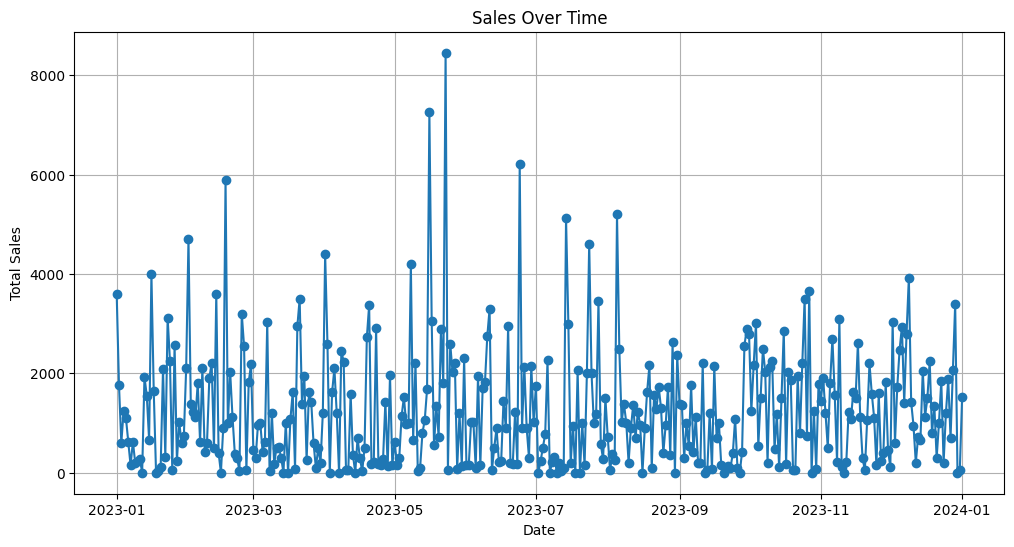

In [31]:
import matplotlib.pyplot as plt

# Plotting the sales data
plt.figure(figsize=(12, 6))
plt.plot(sales_data, marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

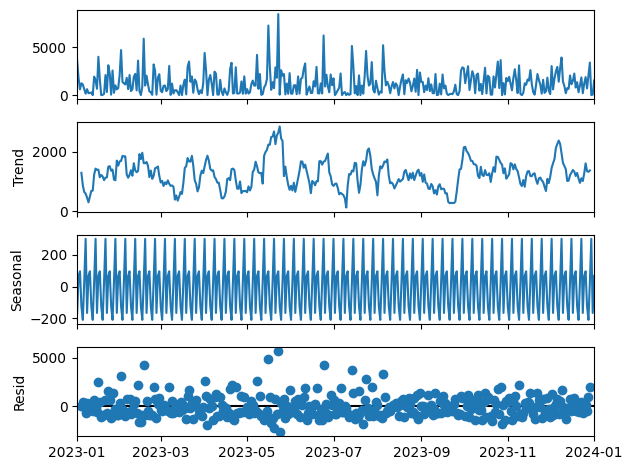

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(sales_data, model='additive', period=7)
decomposition.plot()
plt.show()


                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3114.547
Date:                Mon, 05 Aug 2024   AIC                           6235.094
Time:                        20:44:17   BIC                           6246.793
Sample:                    01-01-2023   HQIC                          6239.743
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.054      0.857      0.391      -0.060       0.153
ma.L1         -1.0000      0.039    -25.675      0.000      -1.076      -0.924
sigma2      1.492e+06   2.62e-08   5.69e+13      0.0

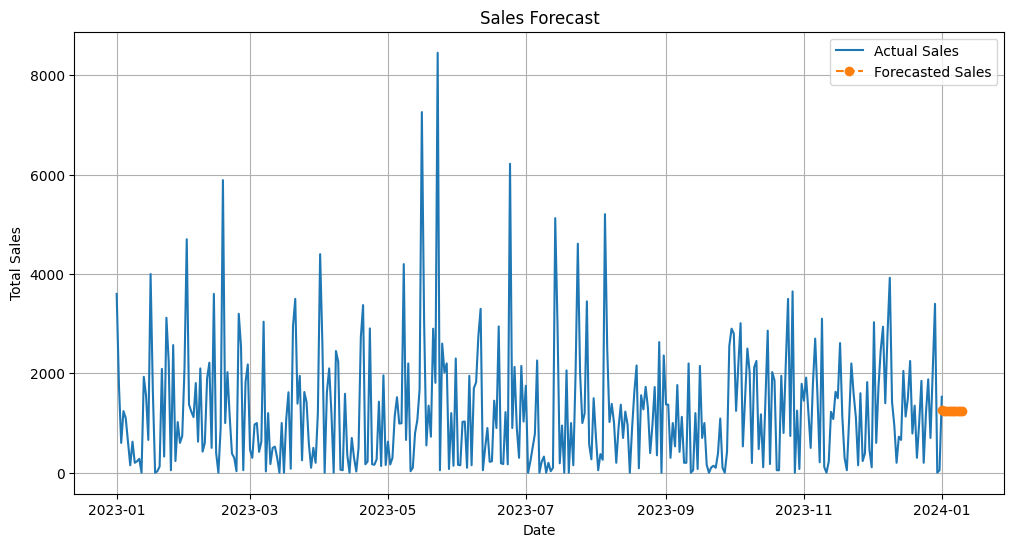

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fitting the ARIMA model
model = ARIMA(sales_data, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting future sales
forecast = model_fit.forecast(steps=10)
forecast_dates = pd.date_range(start=sales_data.index[-1], periods=10, freq='D')

# Printing the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Sales': forecast})
print(forecast_df)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_data, label='Actual Sales')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', linestyle='--', marker='o')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(sales_data, model_fit.fittedvalues))
print(f'RMSE: {rmse}')


RMSE: 1240.4623156820396


## Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

### Gender Distribution

Gender
Female    510
Male      490
Name: count, dtype: int64


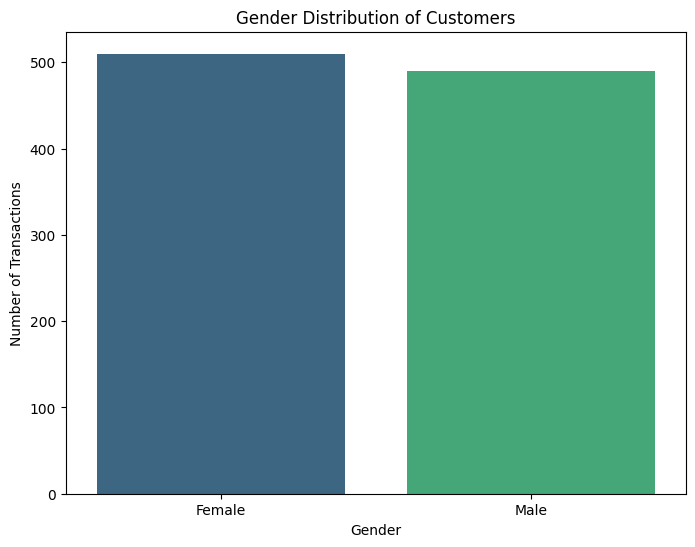

In [41]:
import seaborn as sns
# Gender distribution
gender_counts = df_retail['Gender'].value_counts()
print(gender_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()


#### Purchasing behavior of Each Gender

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


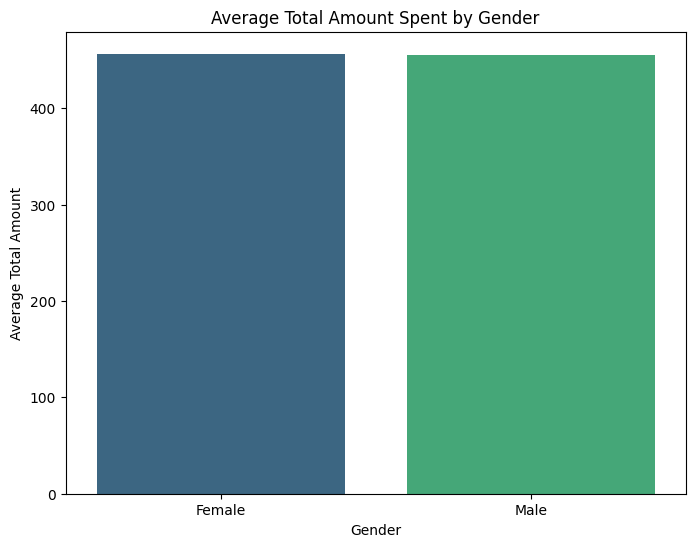

In [43]:

# Average total amount spent by gender
avg_total_amount = df_retail.groupby('Gender')['Total Amount'].mean()
print(avg_total_amount)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_total_amount.index, y=avg_total_amount.values, palette='viridis')
plt.title('Average Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Amount')
plt.show()

Gender
Female    2.545098
Male      2.481633
Name: Quantity, dtype: float64


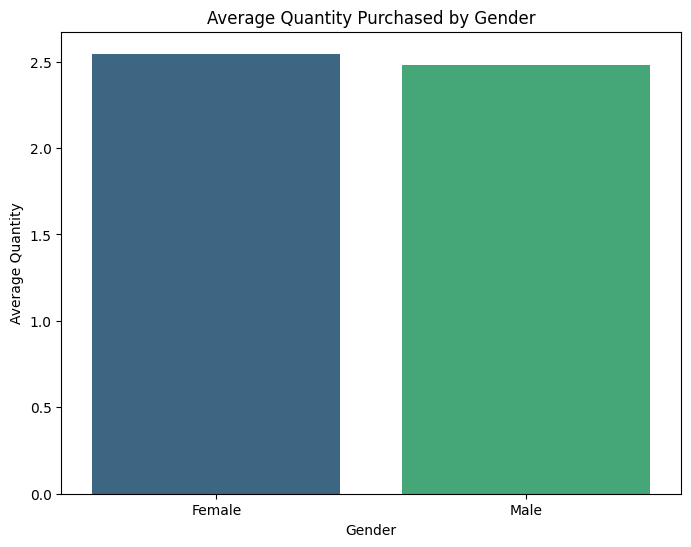

In [44]:
# Average quantity purchased by gender
avg_quantity = df_retail.groupby('Gender')['Quantity'].mean()
print(avg_quantity)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_quantity.index, y=avg_quantity.values, palette='viridis')
plt.title('Average Quantity Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Quantity')
plt.show()

### Age Distribution